##### SARIMA model (Seasonal ARIMA)

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
import pandas as pd

df = pd.read_csv(r'C:\E\E_drive_copy\sample_data\ts_ud\Resources\Data + Code\us-airlines-monthly-aircraft-miles-flown.csv', parse_dates=[0])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    96 non-null     datetime64[ns]
 1   MilesMM  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
df.shape

(96, 2)

In [7]:
df.index = df['Month']

In [8]:
df.head(2)

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178


In [9]:
# checking seasonality and trend of the data

from statsmodels.tsa.seasonal import seasonal_decompose

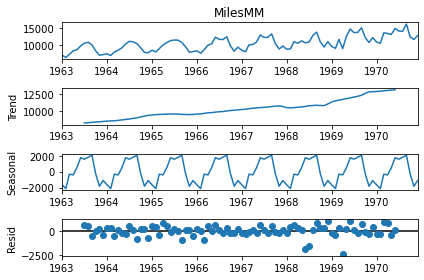

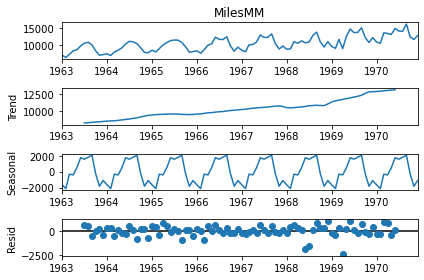

In [10]:
sd = seasonal_decompose(df['MilesMM'])
sd.plot()

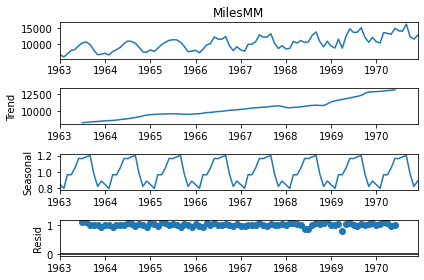

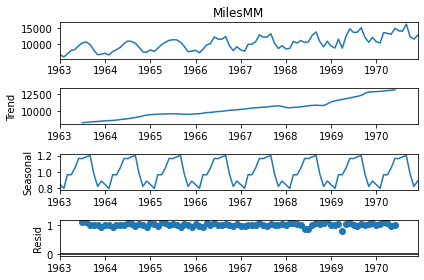

In [11]:
sd2 = seasonal_decompose(df['MilesMM'], model='multiplicative')
sd2.plot()

In [13]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12)).fit()

C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
# errors

model.resid

Month
1963-01-01    6827.000000
1963-02-01     305.577224
1963-03-01    1660.958715
1963-04-01    1040.336073
1963-05-01    1393.573332
                 ...     
1970-08-01    -672.820395
1970-09-01     -22.818124
1970-10-01    -732.943580
1970-11-01     915.048218
1970-12-01    -541.692600
Length: 96, dtype: float64

<AxesSubplot:xlabel='Month'>

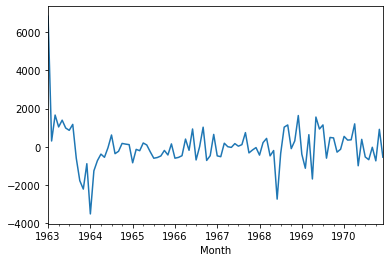

In [16]:
model.resid.plot()

In [17]:
# prediction for next timeline

model.forecast()

1971-01-01    11476.397714
Freq: MS, dtype: float64

In [23]:
pred_12_mnt = model.forecast(12) # next 12 months prediction
pred_12_mnt

1971-01-01    11476.397714
1971-02-01    11153.654974
1971-03-01    13670.253536
1971-04-01    12648.193793
1971-05-01    14338.987790
1971-06-01    15786.927365
1971-07-01    14979.775514
1971-08-01    15362.325778
1971-09-01    16963.422628
1971-10-01    13682.171200
1971-11-01    12427.147019
1971-12-01    13730.712175
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

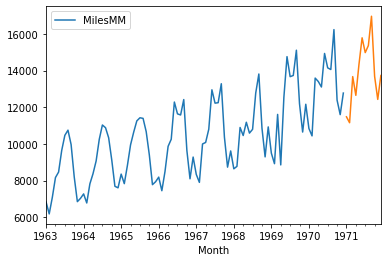

In [24]:
# plotting data and predictions

df.drop(columns='Month').plot()
pred_12_mnt.plot()

<AxesSubplot:xlabel='Month'>

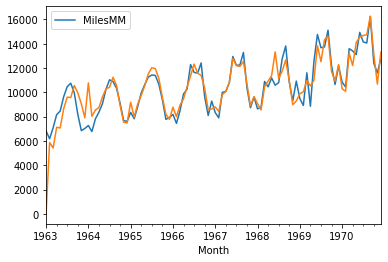

In [25]:
df.drop(columns='Month').plot()
model.predict().plot()  # for predoct method we need to pass start and end time period. otherwise, it will predict for available times